In [ ]:
!pip install shap
!pip install statannot
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import argparse
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Unir os dados gerados
descriptors=pd.read_csv("/content/descriptors.tsv", sep="\t")
descriptors_II=pd.read_csv("/content/descriptors_II.txt", sep="\t")
labels=pd.read_csv("/content/labels.txt", sep="\t")

df=pd.merge(descriptors, descriptors_II, on='header', how='outer')
df1=df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(df1,labels, train_size = 0.3, random_state = 42, stratify =labels)


In [ ]:
def best_scalling(X_train,X_test,y_train,y_test,Algorithm):
  results=list()
  scaler=[StandardScaler(),  MinMaxScaler(),MaxAbsScaler(),  RobustScaler(), QuantileTransformer(output_distribution="uniform"), QuantileTransformer(output_distribution="normal"), Normalizer()]
  for k in scaler:
    pipe = make_pipeline( k, Algorithm)
    pipe.fit(X_train, y_train)
    results.append(pipe.score(X_test,y_test))
  df=pd.DataFrame(list(zip(['StandardScaler','MinMaxScaler','MaxAbsScaler','RobustScaler', 'Uniform','Normal', 'Normalize'],results)), columns=['Method','Method score'])
  return df


In [ ]:
Gaussian=best_scalling(X_train,X_test,y_train.values.ravel(), y_test.values.ravel(),GaussianNB())
RandomForest=best_scalling(X_train,X_test,y_train.values.ravel(), y_test.values.ravel(),RandomForestClassifier(random_state=42))
SVM=best_scalling(X_train,X_test,y_train.values.ravel(), y_test.values.ravel(),svm.SVC(random_state=42))
Decision_Tree=best_scalling(X_train,X_test,y_train.values.ravel(), y_test.values.ravel(),tree.DecisionTreeClassifier(random_state=42))
scales=pd.DataFrame(list(zip(Gaussian['Method'],Gaussian['Method score'], RandomForest['Method score'], SVM['Method score'], Decision_Tree['Method score'])), columns=['Escalling method','GaussianNB','Random Forest','SVM','Decission tree'])

n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.


Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'StandardScaler'),
  Text(1, 0, 'MinMaxScaler'),
  Text(2, 0, 'MaxAbsScaler'),
  Text(3, 0, 'RobustScaler'),
  Text(4, 0, 'Uniform'),
  Text(5, 0, 'Normal'),
  Text(6, 0, 'Normalize')])

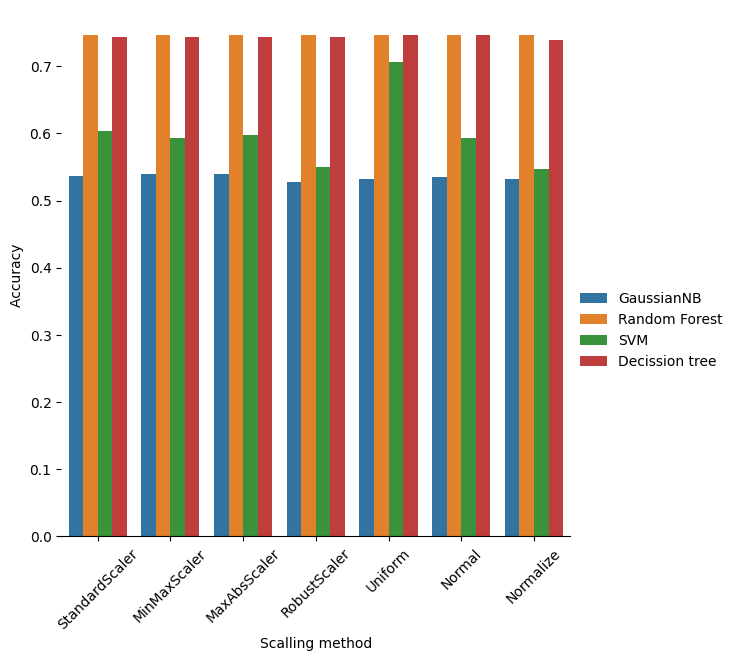

In [ ]:
import seaborn as sns
scales.melted=pd.melt(scales, id_vars=['Escalling method'], value_vars=['GaussianNB', 'Random Forest','SVM','Decission tree'])
g=sns.catplot(
    data=scales.melted, kind="bar",
    x="Escalling method", y="value", hue="variable", palette="tab10", height=6
)
g.despine(left=True)
g.set_axis_labels("Scalling method", "Accuracy ")
g.legend.set_title("")
plt.xticks(rotation=45)

In [ ]:
pipeline_SVM = Pipeline(steps=[('scaler',QuantileTransformer(output_distribution="uniform")),('SVM_estimator',svm.SVC(random_state=42))])

pipeline_RF=Pipeline(steps=[('scaler',StandardScaler()),('RF_estimator',RandomForestClassifier(random_state=42))])

pipeline_DT=Pipeline(steps=[('scaler',StandardScaler()),('DT_estimator',tree.DecisionTreeClassifier(random_state=42))])

pipeline_GNB=Pipeline(steps=[('scaler',MinMaxScaler()),('GNB_estimator',GaussianNB())])

searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()
algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
for clf in searches:
  scores.append(cross_val_score(clf,X_train,y_train.values.ravel(), cv=5).mean())
df_Train = pd.DataFrame({'Algorithm': algo, 'Train data': scores}).set_index('Algorithm')

n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.


In [ ]:
searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
scores = list()
for clf in searches:
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

df_Test  = pd.DataFrame({'Algorithm': algo, 'Accuracy test': scores}).set_index('Algorithm')

n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.


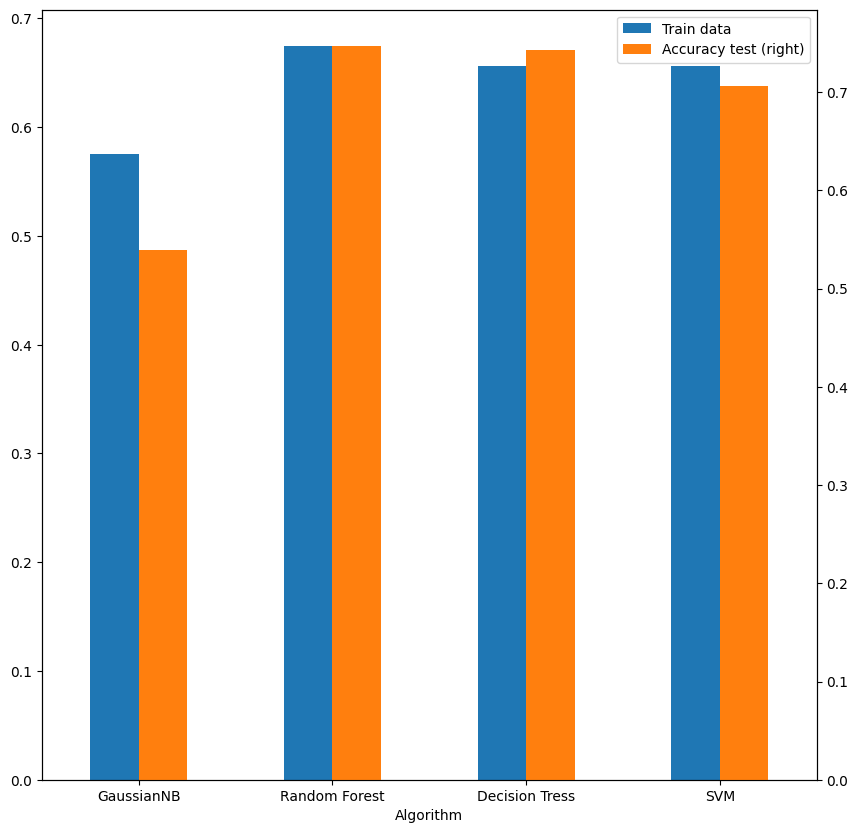

In [ ]:
import seaborn as sns

df = pd.merge(df_Train,df_Test,
               on='Algorithm')

df.plot( kind= 'bar' , secondary_y= 'Accuracy test' , rot= 0, figsize=(10,10))
plt.show()

n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.


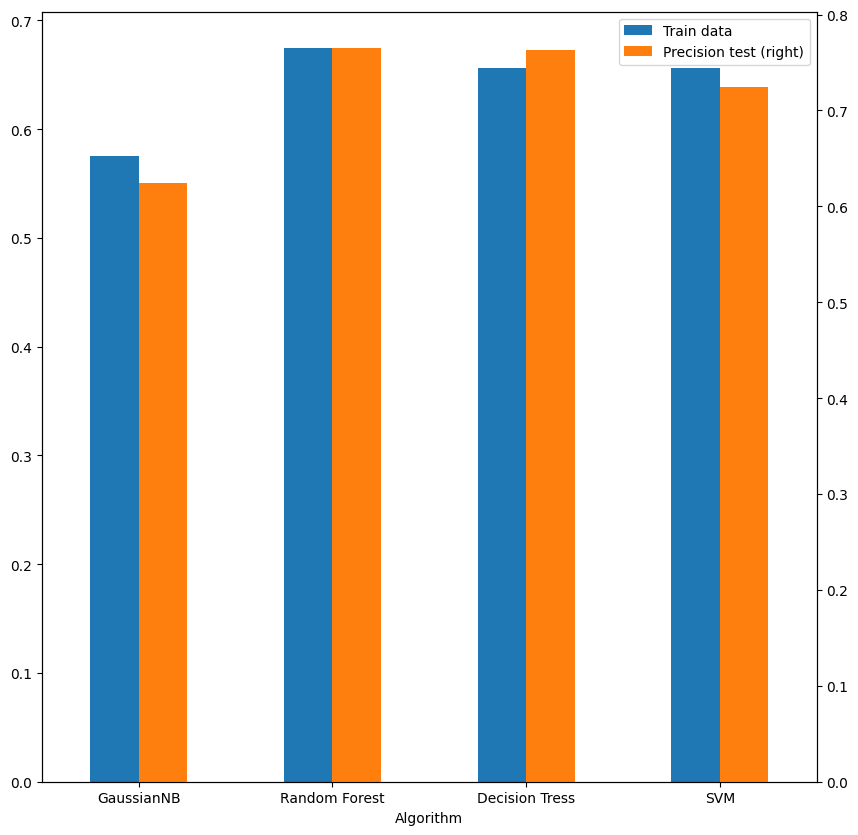

In [ ]:
searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()

algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
scores = list()

for clf in searches:
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    scores.append(precision_score(y_test, y_pred, average='macro'))

df_Test_precision  = pd.DataFrame({'Algorithm': algo, 'Precision test': scores}).set_index('Algorithm')

df2 = pd.merge(df_Train,df_Test_precision,
               on='Algorithm')

df2.plot( kind= 'bar' , secondary_y= 'Precision test' , rot= 0, figsize=(10,10))
plt.show()

n_quantiles (1000) is greater than the total number of samples (224). n_quantiles is set to n_samples.


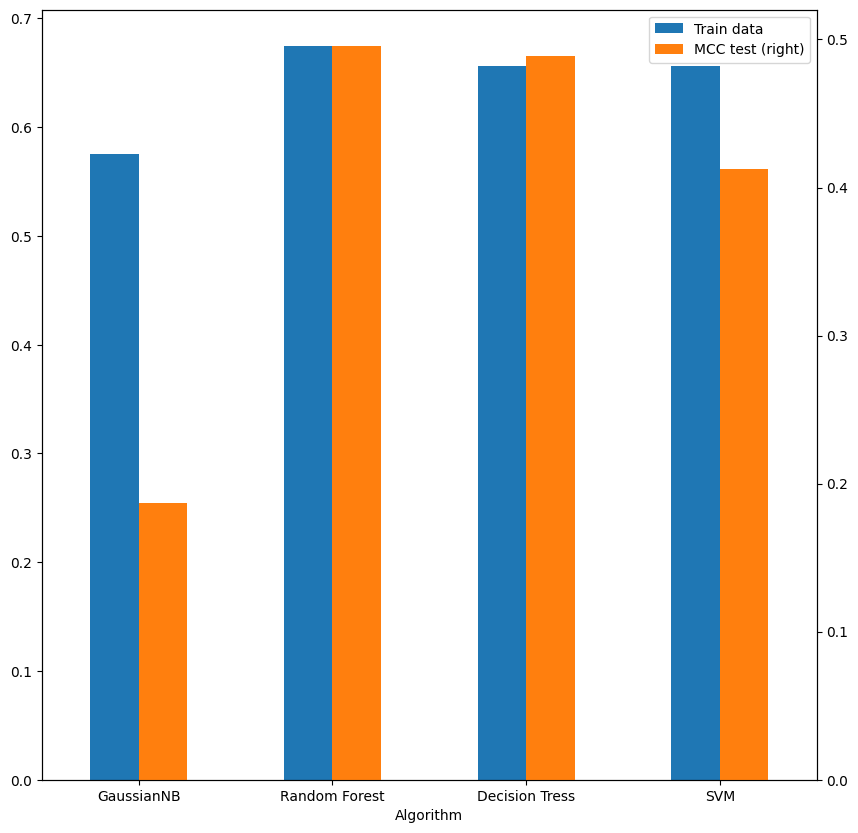

In [ ]:
searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()

algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
scores = list()
from sklearn.metrics import matthews_corrcoef
for clf in searches:
    clf = clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    scores.append(matthews_corrcoef(y_test, y_pred))

df_Test_MCC  = pd.DataFrame({'Algorithm': algo, 'MCC test': scores}).set_index('Algorithm')

df3 = pd.merge(df_Train,df_Test_MCC,
               on='Algorithm')

df3.plot( kind= 'bar' , secondary_y= 'MCC test' , rot= 0, figsize=(10,10))
plt.show()

In [ ]:
pipeline_SVM = Pipeline(steps=[('scaler',QuantileTransformer(output_distribution="uniform")),('SVM_estimator',svm.SVC(random_state=42))])

pipeline_RF=Pipeline(steps=[('scaler',StandardScaler()),('RF_estimator',RandomForestClassifier(random_state=42))])

pipeline_DT=Pipeline(steps=[('scaler',StandardScaler()),('DT_estimator',tree.DecisionTreeClassifier(random_state=42))])

pipeline_GNB=Pipeline(steps=[('scaler',MinMaxScaler()),('GNB_estimator',GaussianNB())])
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_train)

searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()
algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
for clf in searches:
  scores.append(cross_val_score(clf,X_train,y_train.values.ravel(), cv=5, scoring ='roc_auc'))
df_rocAUC = pd.DataFrame({'Algorithm': algo, 'Train data': scores}).set_index('Algorithm')
df_rocAUC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.


,Train data
Algorithm,
GaussianNB,"[0.6359126984126984, 0.5634920634920635, 0.625..."
Random Forest,"[0.7261904761904762, 0.8531746031746031, 0.768..."
Decision Tress,"[0.6299603174603176, 0.8234126984126985, 0.745..."
SVM,"[0.6726190476190476, 0.5853174603174602, 0.676..."


In [ ]:
searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()
algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
for clf in searches:
  scores.append(cross_val_score(clf,X_train,y_train.values.ravel(), cv=5, scoring ='accuracy'))
df_accuracy = pd.DataFrame(scores,columns=['c1','c2','c3','c4','c5'])
df_accuracy['Algorithm'] = ['GaussianNB','Random Forest','Decision Tress','SVM']
df_accuracy.m = pd.melt(df_accuracy,id_vars=['Algorithm'],var_name='cross validation round',value_name='Accuracy')

n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.
Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [ ]:
df_accuracy.m

,Algorithm,cross validation round,Accuracy
0,GaussianNB,c1,0.555556
1,Random Forest,c1,0.644444
2,Decision Tress,c1,0.600000
3,SVM,c1,0.666667
4,GaussianNB,c2,0.533333
5,Random Forest,c2,0.733333
6,Decision Tress,c2,0.688889
7,SVM,c2,0.622222
8,GaussianNB,c3,0.600000
9,Random Forest,c3,0.622222


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

GaussianNB v.s. Random Forest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.067e-01 U_stat=2.000e+00
Random Forest v.s. Decision Tress: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.500e+01
Decision Tress v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.350e+01
GaussianNB v.s. Decision Tress: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.633e-01 U_stat=2.500e+00
Random Forest v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.450e+01
GaussianNB v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.169e-01 U_stat=2.000e+00


(<Axes: xlabel='Algorithm', ylabel='Accuracy'>,
  <statannot.StatResult.StatResult at 0x7f807d935330>])

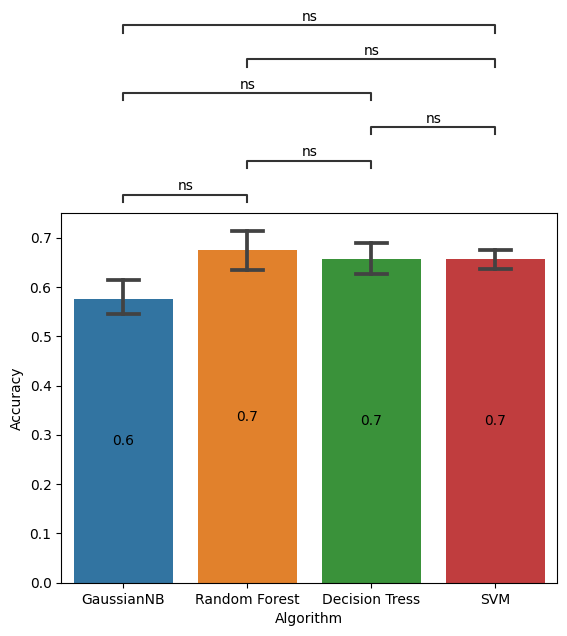

In [ ]:
from statannot import add_stat_annotation
x = 'Algorithm'
y = 'Accuracy'
ax = sns.barplot(data=df_accuracy.m, x=x, y=y, capsize=0.25)
ax.bar_label(ax.containers[0], fmt='%.1f', label_type='center')
add_stat_annotation(ax, data=df_accuracy.m, x=x, y=y,
                    box_pairs=[("GaussianNB", "Random Forest"), ("Random Forest", "Decision Tress"), ("GaussianNB", "Decision Tress"),("Random Forest","SVM"),('GaussianNB','SVM'),('Decision Tress','SVM')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (179). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (180). n_quantiles is set to n_samples.
Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

GaussianNB v.s. Random Forest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.762e-02 U_stat=0.000e+00
Random Forest v.s. Decision Tress: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.800e+01
Decision Tress v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.333e-01 U_stat=2.200e+01
GaussianNB v.s. Decision Tress: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.905e-01 U_stat=2.000e+00
Random Forest v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.762e-02 U_stat=2.500e+01
GaussianNB v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.000e+00


(<Axes: xlabel='Algorithm', ylabel='ROC-AUC'>,
  <statannot.StatResult.StatResult at 0x7fa858c2d030>])

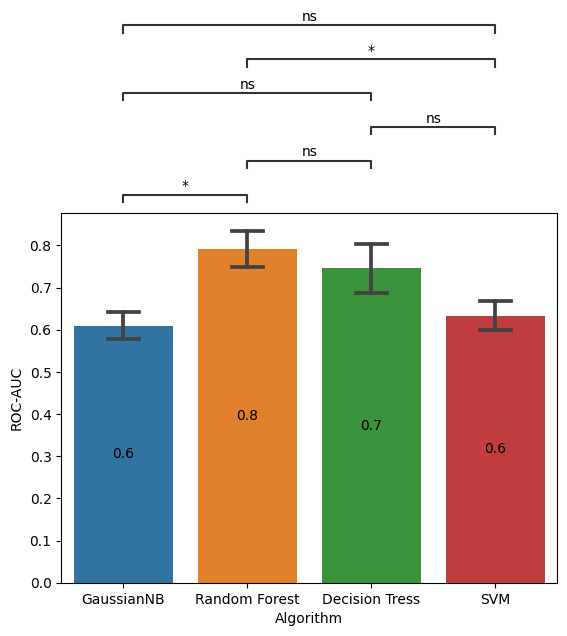

In [ ]:
searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()
algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
for clf in searches:
  scores.append(cross_val_score(clf,X_train,y_train.values.ravel(), cv=5, scoring ='roc_auc'))
df_rocAUC = pd.DataFrame(scores,columns=['c1','c2','c3','c4','c5'])
df_rocAUC['Algorithm'] = ['GaussianNB','Random Forest','Decision Tress','SVM']
df_rocAUC.m = pd.melt(df_rocAUC,id_vars=['Algorithm'],var_name='cross validation round',value_name='ROC-AUC')
from statannot import add_stat_annotation
x = 'Algorithm'
y = 'ROC-AUC'
ax = sns.barplot(data=df_rocAUC.m, x=x, y=y, capsize = 0.25)
ax.bar_label(ax.containers[0], fmt='%.1f', label_type='center')
add_stat_annotation(ax, data=df_rocAUC.m, x=x, y=y,
                    box_pairs=[("GaussianNB", "Random Forest"), ("Random Forest", "Decision Tress"), ("GaussianNB", "Decision Tress"),("Random Forest","SVM"),('GaussianNB','SVM'),('Decision Tress','SVM')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
n_quantiles (1000) is greater than the total number of samples (202). n_q

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

GaussianNB v.s. Random Forest: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.718e-01 U_stat=3.100e+01
Random Forest v.s. Decision Tress: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.950e+01
Decision Tress v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.650e+01
GaussianNB v.s. Decision Tress: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.257e-01 U_stat=2.900e+01
Random Forest v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.650e+01
GaussianNB v.s. SVM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.300e+01


(<Axes: xlabel='Algorithm', ylabel='MCC'>,
  <statannot.StatResult.StatResult at 0x7fa8582ba350>])

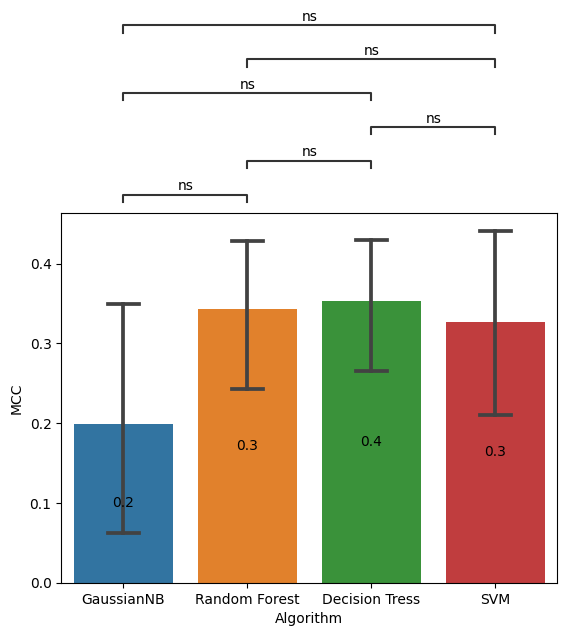

In [ ]:
searches=[pipeline_GNB,pipeline_RF,pipeline_DT,pipeline_SVM]
scores=list()
algo=['GaussianNB', 'Random Forest', 'Decision Tress', 'SVM']
for clf in searches:
  scores.append(cross_val_score(clf,X_train,y_train.values.ravel(), cv=5, scoring ='matthews_corrcoef'))
df_MCC = pd.DataFrame(scores,columns=['c1','c2','c3','c4','c5'])
df_MCC['Algorithm'] = ['GaussianNB','Random Forest','Decision Tress','SVM']
df_MCC.m = pd.melt(df_MCC,id_vars=['Algorithm'],var_name='cross validation round',value_name='MCC')
from statannot import add_stat_annotation
x = 'Algorithm'
y = 'MCC'
ax = sns.barplot(data=df_MCC.m, x=x, y=y, capsize = 0.25)
ax.bar_label(ax.containers[0], fmt='%.1f', label_type='center')
add_stat_annotation(ax, data=df_MCC.m, x=x, y=y,
                    box_pairs=[("GaussianNB", "Random Forest"), ("Random Forest", "Decision Tress"), ("GaussianNB", "Decision Tress"),("Random Forest","SVM"),('GaussianNB','SVM'),('Decision Tress','SVM')],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [ ]:
#Stablishing the parameters to be tested

param_grid_RF={'RF_estimator__max_depth':[None,2,4,8,10,12], #None
              'RF_estimator__min_samples_split': [2, 5, 10],
               'RF_estimator__criterion':['gini','entropy','log_loss'],
               'RF_estimator__max_features':['sqrt','log2',None],
               'RF_estimator__bootstrap':[False,True]}

pipeline_RF=Pipeline(steps=[('scaler',StandardScaler()), ('RF_estimator',RandomForestClassifier(random_state=42))])

RF_search=GridSearchCV(pipeline_RF, param_grid_RF, refit=True, cv=5)
best_model_RF = RF_search.fit(X_train,y_train.values.ravel())

In [ ]:
print(best_model_RF.best_params_, best_model_RF.best_score_)

{'RF_estimator__bootstrap': False, 'RF_estimator__criterion': 'entropy', 'RF_estimator__max_depth': 2, 'RF_estimator__max_features': 'log2', 'RF_estimator__min_samples_split': 2} 0.7188888888888889


In [ ]:
y_pred=best_model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         NWT       0.68      0.98      0.80       287
          WT       0.94      0.44      0.60       238

    accuracy                           0.73       525
   macro avg       0.81      0.71      0.70       525
weighted avg       0.79      0.73      0.71       525



<Axes: >

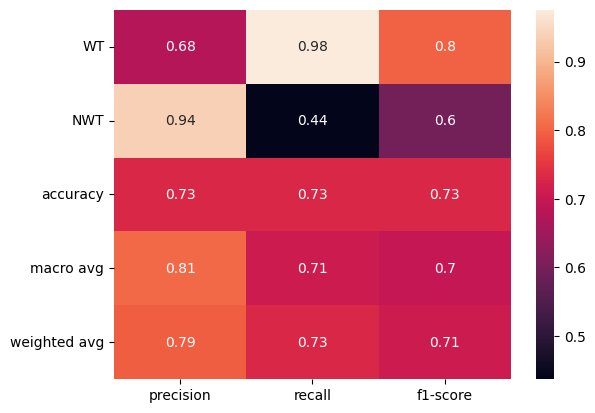

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=['WT','NWT'],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

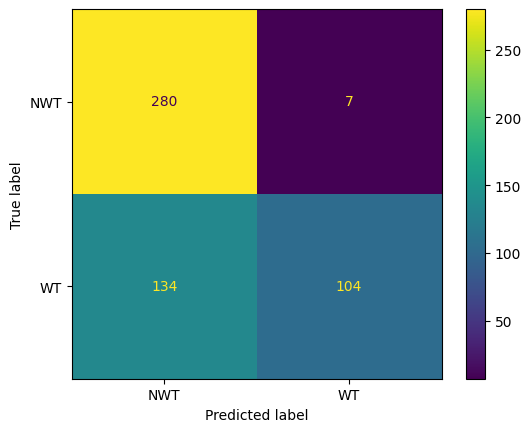

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
RF=Pipeline(steps=[('scaler',StandardScaler()), ('RF_estimator',RandomForestClassifier(random_state=42,
                                                                                                bootstrap = False,
                                                                                                criterion = 'entropy', max_depth = 2, max_features = 'log2', min_samples_split =2))])

In [ ]:
model_RF = RF.fit(X_train,y_train.values.ravel())

[Text(0.5, 23.52222222222222, 'Relative importance (%)'),
 Text(-81.27777777777779, 0.5, 'Protein descriptor')]

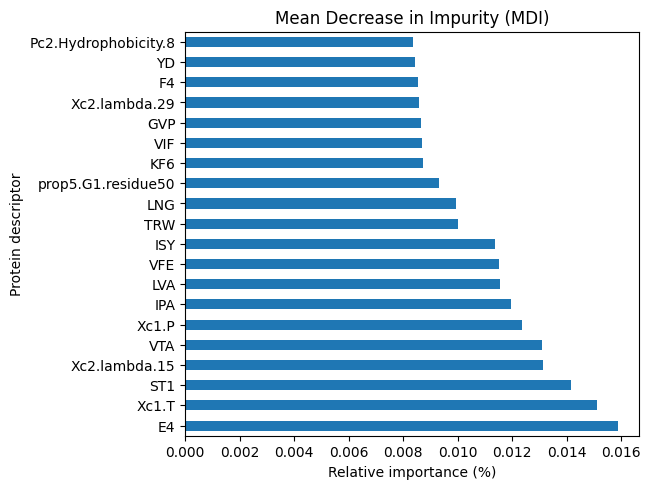

In [ ]:
feature_names = model_RF[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    model_RF[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
df_importances = mdi_importances[:20]
ax = df_importances.plot.barh()
ax.set_title("Mean Decrease in Impurity (MDI)")
ax.figure.tight_layout()
ax.set(xlabel='Relative importance (%)', ylabel='Protein descriptor')

In [ ]:
cor_matrix = df1.corr(method='spearman').abs()
print(cor_matrix)

           A         R         N         D         C         E         Q  \
A   1.000000  0.318734  0.141865  0.039361  0.259918  0.419242  0.524993   
R   0.318734  1.000000  0.253669  0.451968  0.029810  0.753959  0.698862   
N   0.141865  0.253669  1.000000  0.608837  0.766145  0.395147  0.664003   
D   0.039361  0.451968  0.608837  1.000000  0.307746  0.256272  0.417612   
C   0.259918  0.029810  0.766145  0.307746  1.000000  0.232270  0.524122   
..       ...       ...       ...       ...       ...       ...       ...   
Z1  0.488766  0.360831  0.425226  0.290353  0.540176  0.592279  0.608000   
Z2  0.640478  0.142876  0.583585  0.167221  0.772777  0.421423  0.638615   
Z3  0.112127  0.657891  0.474671  0.551108  0.018483  0.613217  0.501943   
Z4  0.266012  0.538726  0.552984  0.471595  0.316740  0.655228  0.611472   
Z5  0.336075  0.424398  0.664898  0.673580  0.334691  0.398090  0.458339   

           G         H         I  ...     VHSE4     VHSE5     VHSE6     VHSE7  \
A   0.

In [ ]:
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.reduced=df1.drop(to_drop, axis=1)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.reduced,labels, train_size = 0.3, random_state = 42, stratify =labels)

In [ ]:
RF=Pipeline(steps=[('scaler',StandardScaler()), ('RF_estimator',RandomForestClassifier(random_state=42,
                                                                                                bootstrap = False,
                                                                                                criterion = 'entropy', max_depth = 2, max_features = 'log2', min_samples_split =2))])
model_RF = RF.fit(X_train,y_train.values.ravel())

In [ ]:
y_pred=model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         NWT       0.68      0.94      0.79       287
          WT       0.87      0.47      0.61       238

    accuracy                           0.73       525
   macro avg       0.78      0.71      0.70       525
weighted avg       0.77      0.73      0.71       525



In [ ]:
from sklearn.inspection import permutation_importance

result_train = permutation_importance(
    model_RF, X_train, y_train, n_repeats=5, random_state=42, n_jobs=10
)

KeyboardInterrupt: ignored

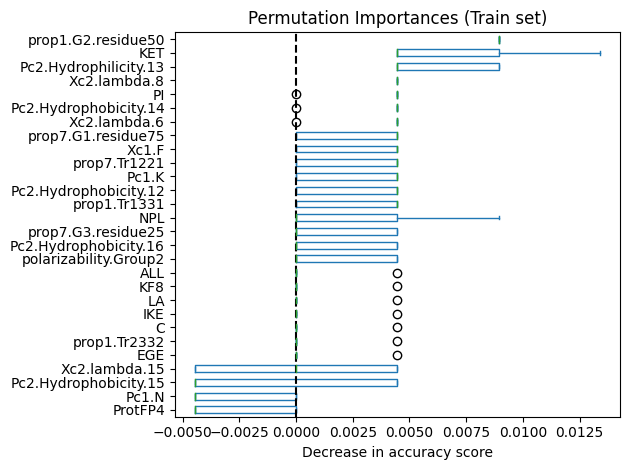

In [ ]:
sorted_importances_idx = result_train.importances_mean.argsort()

importances = pd.DataFrame(
    result_train.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

importances = importances.loc[(importances.sum(axis=1) != 0), (importances.sum(axis=0) != 0)]

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (Train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
result_test = permutation_importance(
    model_RF, X_test, y_test, n_repeats=5, random_state=42, n_jobs=10
)

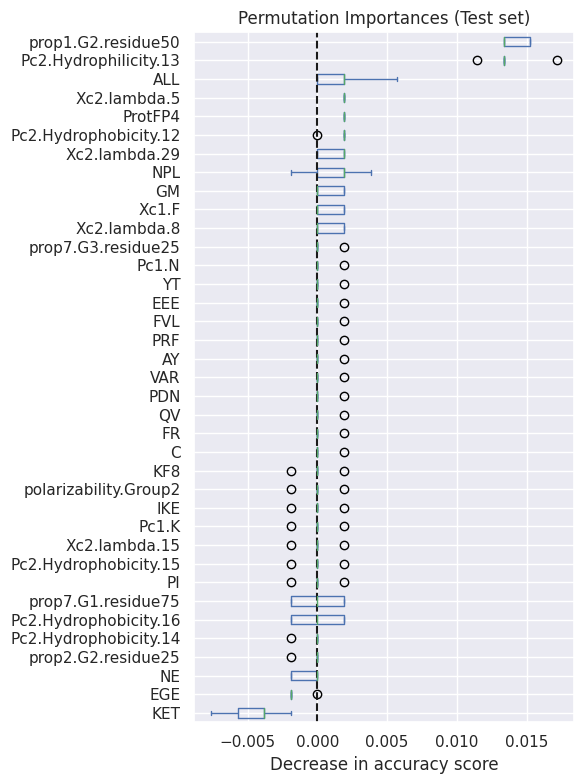

In [ ]:
sorted_importances_idx = result_test.importances_mean.argsort()

importances = pd.DataFrame(
    result_test.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)


importances = importances.loc[(importances.sum(axis=1) != 0), (importances.sum(axis=0) != 0)]

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (Test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

sns.set(rc={'figure.figsize':(5,8)})